# Pokémon Power Analysis: Unveiling Legends and Commoners

Featuring a dataset of 721 Pokémon and their detailed attributes, this project tries to unravel the mysteries behind Pokémon power dynamics. 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
pokemon = pd.read_csv('pokemon.csv')
stats_features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [3]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Some special Pokémons have redundancy in their names
pokemon['Name'] = pokemon['Name'].apply(lambda x: re.sub('^.*(?=Mega)',   '', x))
pokemon['Name'] = pokemon['Name'].apply(lambda x: re.sub('^.*(?=Primal)', '', x))
pokemon['Name'] = pokemon['Name'].apply(lambda x: re.sub('^.*(?=Black)',  '', x))

In [5]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Let's look at some extreme top/worst performers of the Pokemon world.

### Best Pokemon

In [6]:
for col in stats_features:
    print(f'Best pokemon by {col}: {pokemon.loc[pokemon[col].argmax(), "Name"]}, {col}={pokemon[col].max()}')
print('')

Best pokemon by Total: Mega Mewtwo X, Total=780
Best pokemon by HP: Blissey, HP=255
Best pokemon by Attack: Mega Mewtwo X, Attack=190
Best pokemon by Defense: Mega Steelix, Defense=230
Best pokemon by Sp. Atk: Mega Mewtwo Y, Sp. Atk=194
Best pokemon by Sp. Def: Shuckle, Sp. Def=230
Best pokemon by Speed: DeoxysSpeed Forme, Speed=180



### Worst Pokemon

In [7]:
for col in stats_features:
    print(f'Worst pokemon by {col}: {pokemon.loc[pokemon[col].argmin(), "Name"]}, {col}={pokemon[col].min()}')
print('')

Worst pokemon by Total: Sunkern, Total=180
Worst pokemon by HP: Shedinja, HP=1
Worst pokemon by Attack: Chansey, Attack=5
Worst pokemon by Defense: Chansey, Defense=5
Worst pokemon by Sp. Atk: Shuckle, Sp. Atk=10
Worst pokemon by Sp. Def: Caterpie, Sp. Def=20
Worst pokemon by Speed: Shuckle, Speed=5



### Overall best pokemon from each generation

In [8]:
print('Overall best pokemon from each generation')
for gen in range(1,7):
    temp = pokemon.loc[pokemon['Generation'] == gen].reset_index()
    print(f'Gen {gen}: {temp.loc[temp["Total"].argmax(), "Name"]}, Total={temp["Total"].max()}')
print('')

Overall best pokemon from each generation
Gen 1: Mega Mewtwo X, Total=780
Gen 2: Mega Tyranitar, Total=700
Gen 3: Mega Rayquaza, Total=780
Gen 4: Arceus, Total=720
Gen 5: Black Kyurem, Total=700
Gen 6: Mega Diancie, Total=700



### Top 5 legendary pokemon

In [9]:
print('Top 5 legendary pokemon')
legendaries = pokemon.loc[pokemon['Legendary']]
top_legendaries = legendaries.loc[legendaries['Total'].sort_values(ascending=False)[:5].index, "Name"]
for j in range(len(top_legendaries)):
    print(f'Top {j+1}: {top_legendaries.iloc[j]}, Total={legendaries["Total"].sort_values().iloc[-(j+1)]}')
print('')

Top 5 legendary pokemon
Top 1: Mega Mewtwo X, Total=780
Top 2: Mega Mewtwo Y, Total=780
Top 3: Mega Rayquaza, Total=780
Top 4: Primal Kyogre, Total=770
Top 5: Primal Groudon, Total=770



### Top 5 Common Pokemon

In [10]:
print('Top 5 common pokemon')
common = pokemon.loc[~pokemon['Legendary']]
top_common = common.loc[common['Total'].sort_values(ascending=False)[:5].index, "Name"]
for j in range(len(top_common)):
    print(f'Top {j+1}: {top_common.iloc[j]}, Total={common["Total"].sort_values().iloc[-(j+1)]}')

Top 5 common pokemon
Top 1: Mega Metagross, Total=700
Top 2: Mega Garchomp, Total=700
Top 3: Mega Salamence, Total=700
Top 4: Mega Tyranitar, Total=700
Top 5: Slaking, Total=670


### Visual Analysis of Legendary Pokémon Distribution and Characteristics

In [11]:
legendaries = pokemon.loc[pokemon['Legendary']]
legendaries_gen = legendaries.groupby('Generation').aggregate('sum')['Legendary']
legendaries_type = pd.concat([legendaries['Type 1'], legendaries['Type 2']]).dropna()

### Pie chart of Legendary vs. Common Pokemons

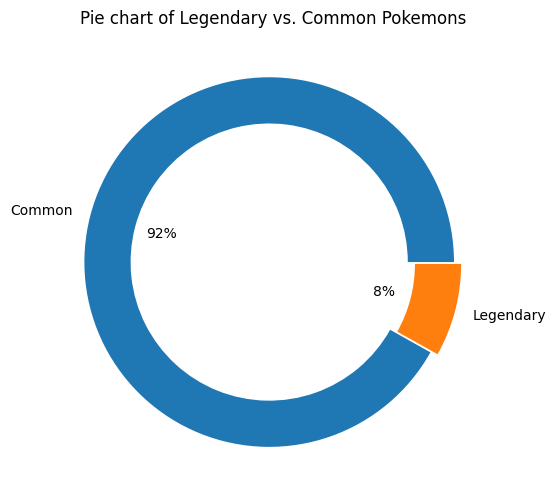

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(pokemon['Legendary'].value_counts(),
        labels=['Common', 'Legendary'],
        autopct='%.0f%%', explode=[0.02, 0.02], wedgeprops={'width':0.25})
ax.set_title('Pie chart of Legendary vs. Common Pokemons')
plt.show()


### Pie chart of Legendary releases by Generation

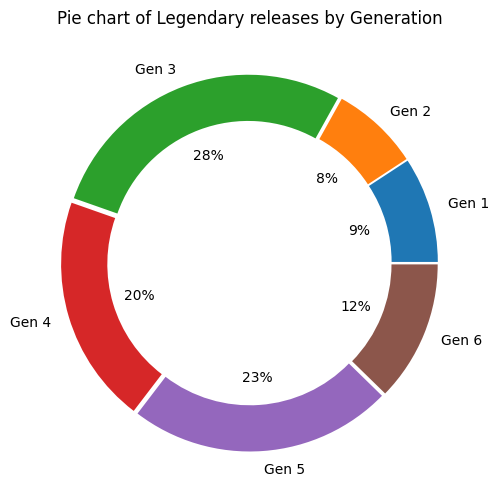

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(legendaries_gen,
        labels=['Gen ' + str(x) for x in legendaries_gen.index],
        autopct='%.0f%%', explode=[0.02]*len(legendaries_gen), wedgeprops={'width':0.25})
ax.set_title('Pie chart of Legendary releases by Generation')
plt.show()


### Count of Legendary types

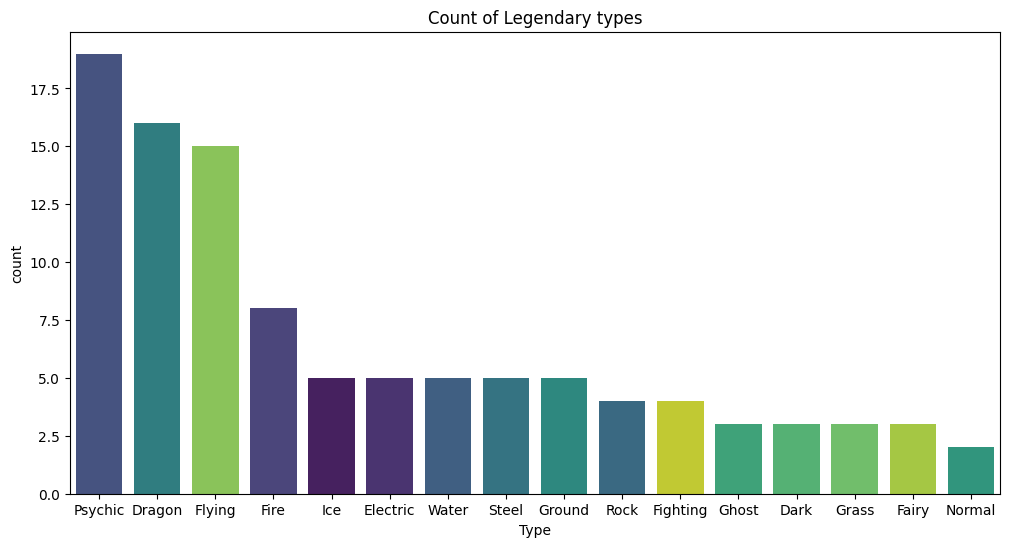

In [14]:
legendaries_type = pd.concat([legendaries['Type 1'], legendaries['Type 2']]).dropna().reset_index(drop=True)
legendaries_type_df = legendaries_type.to_frame(name='Type')

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(ax=ax, x='Type', data=legendaries_type_df, order=legendaries_type.value_counts().index, hue='Type', palette="viridis", legend=False)

ax.set_title('Count of Legendary types')

plt.show()

### Pairplot Analysis of Pokémon Stats with Legendary Classification

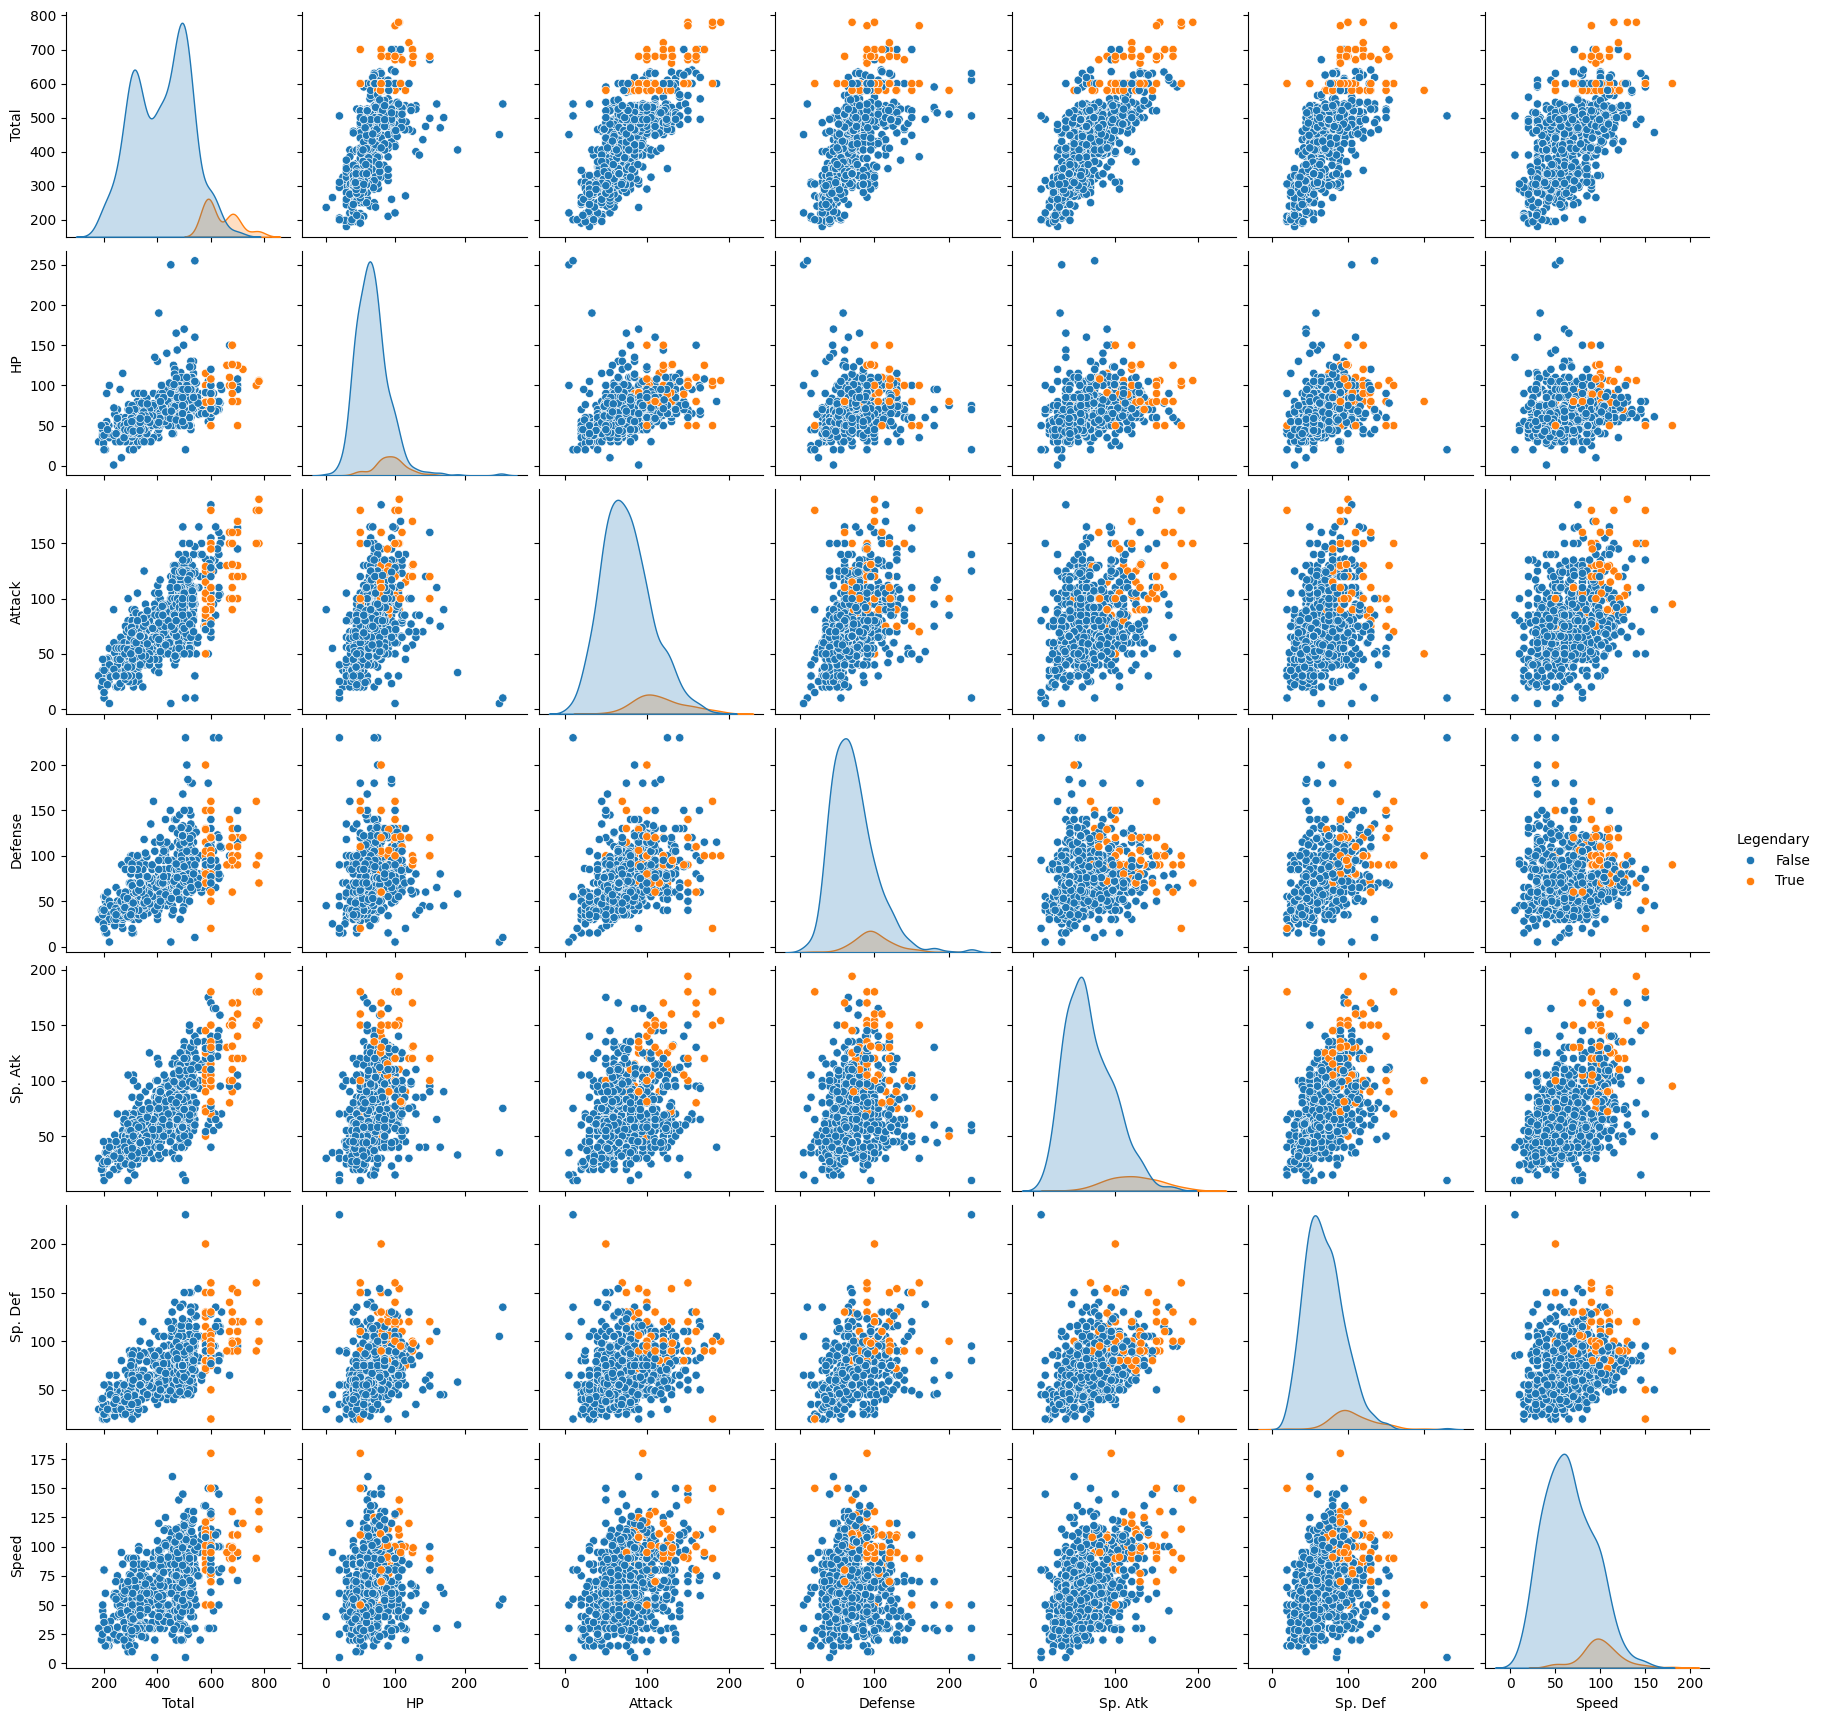

In [15]:
sns.pairplot(data=pokemon[stats_features + ['Legendary']], hue='Legendary')
plt.show()

Legendary Pokémon's individual stats are high, although not great (above median). This explains why the total score of legendaries is much higher than that of common ones: in fact the latter often compensate high values on some statistics with low values on others.

## Pokèmon realease history and Type stats

### Count of Pokemons released in each generation

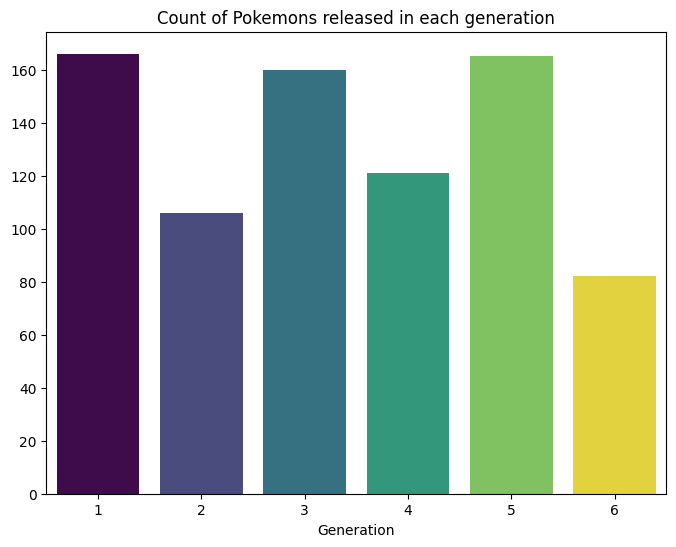

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=pokemon, x='Generation', hue='Generation', palette='viridis', legend=False)
plt.title('Count of Pokemons released in each generation')
plt.ylabel('')
plt.show()

In odd generations, more Pokemon were released. The 6th generation is the one with the lowest number of new Pokemon introduced (half of gen 1-3-5).

## Type Insights

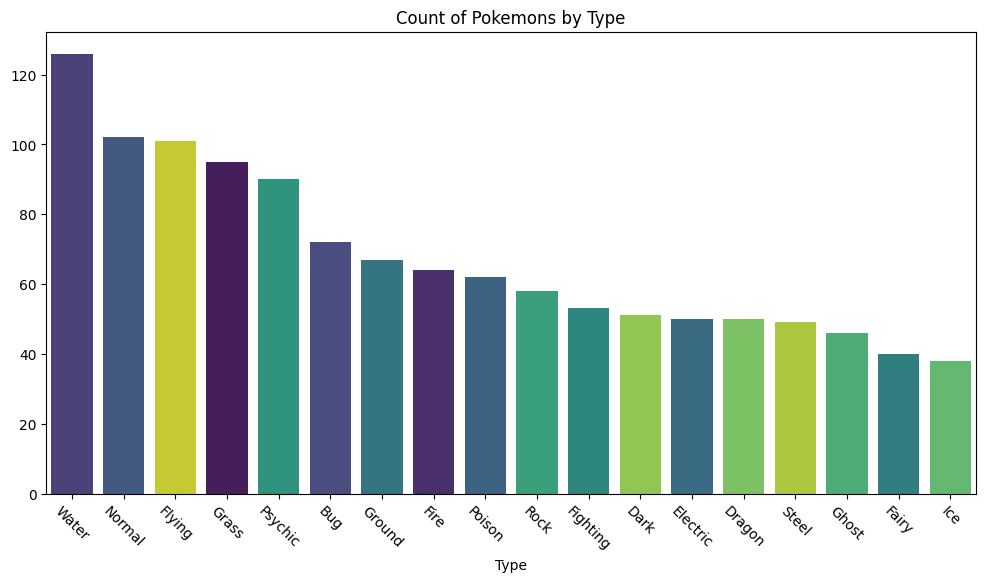

In [17]:
# To provide Type insights, I consider all Pokemon with only one Type:
# those who have two will be present in duplicate with different type
double_types = pokemon.loc[pokemon['Type 2'].notnull()]
double_types_copy = double_types.copy()
double_types_copy['Type 1'] = double_types_copy['Type 2']

# Combine the datasets and reset index
flat_types = pd.concat([pokemon, double_types_copy])
flat_types = flat_types.reset_index(drop=True).drop(columns='Type 2')

# Create the count plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=flat_types, x='Type 1', hue='Type 1', order=flat_types['Type 1'].value_counts().index, palette='viridis', legend=False)

# Set title and adjust labels
ax.set_title('Count of Pokemons by Type')
ax.set_xlabel('Type')
ax.set_ylabel('')
plt.xticks(rotation=-45)

# Show the plot
plt.show()

The Water type is the most widespread of all. An honorable mention goes to: Normal, Flying, Grass, Psychic. On the other side, Ice and Fairy type are much less popular, as there are at least twice less.

### Line Plot of Pokémon Releases by Type per Generation

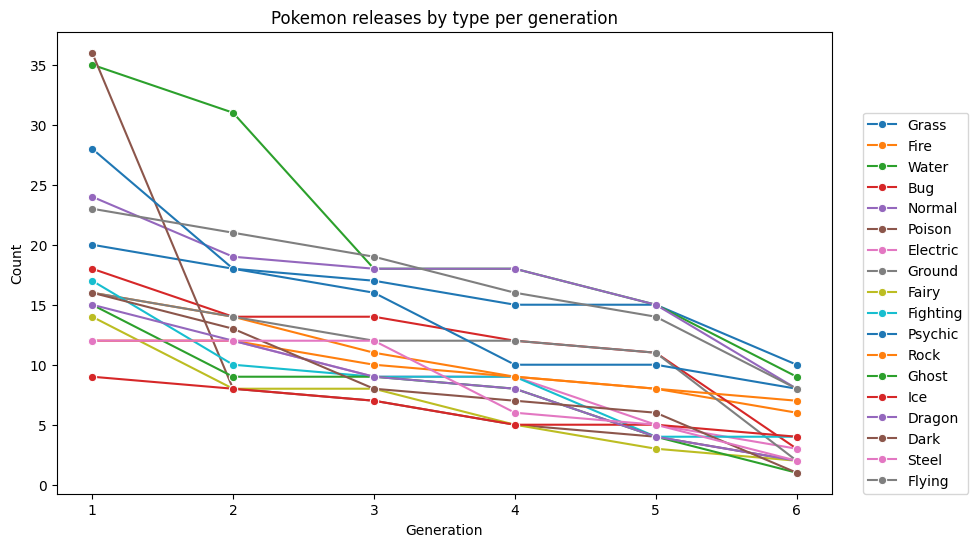

In [18]:
plt.figure(figsize=(10, 6))
for pokemon_type in flat_types['Type 1'].unique():
    temp = flat_types.loc[flat_types['Type 1'] == pokemon_type]
    count = temp['Generation'].value_counts()
    sns.lineplot(x=range(1, 7), y=count, label=pokemon_type, marker='o')
plt.title('Pokemon releases by type per generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.legend(loc=(1.04, 0))
plt.show()

### Scatter Plots of Pokémon Stats by Type

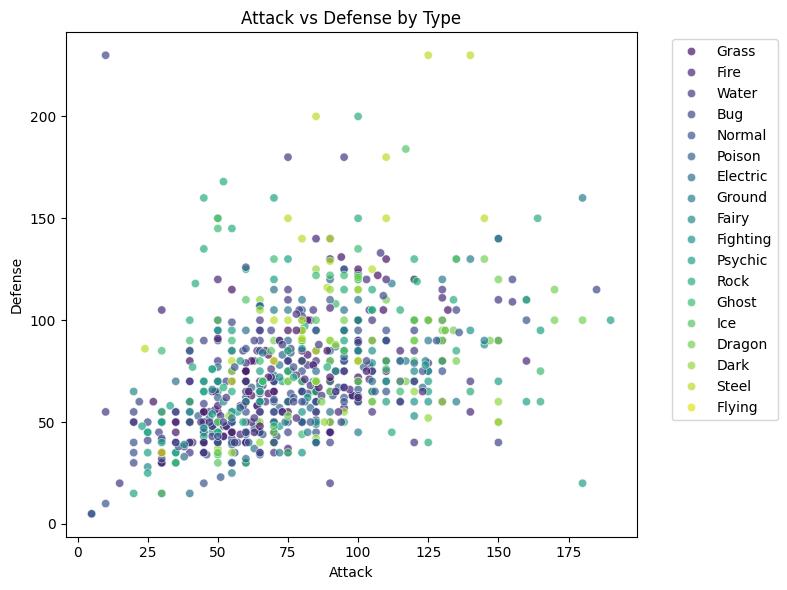

In [19]:
stat1 = 'Attack'
stat2 = 'Defense'

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pokemon, x=stat1, y=stat2, hue='Type 1', palette='viridis', alpha=0.7)
plt.title(f'{stat1} vs {stat2} by Type')
plt.xlabel(stat1)
plt.ylabel(stat2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Conclusion


In conclusion, "Pokémon Power Analysis: Unveiling Legends and Commoners" has provided a comprehensive exploration of Pokémon statistics, revealing fascinating insights into their power dynamics and distribution. From identifying the best and worst Pokémon across various categories to dissecting the powerhouses across generations, this project has shed light on the diverse powers and legacies within the Pokémon universe. Through visual analyses and in-depth examinations, intriguing patterns and correlations have been uncovered, offering a deeper understanding of the complexities within the Pokémon world.